# Practical Deep Learning for Coders - Part 1
Vishal Bakshi

This notebook contains my notes (of course videos, example notebooks and book chapters) and exercises of Part 1 of the course [Practical Deep Learning for Coders](https://course.fast.ai/).

## Lesson 1

### Notebook Exercise
The first thing I did was to run through the [lesson 1 notebook](https://www.kaggle.com/code/vishalbakshi/is-it-a-bird-creating-a-model-from-your-own-data/edit) from start to finish. In this notebook, they download training and validation images of birds and forests then train an image classifier with 100% accuracy in identifying images of birds. 

The first exercise is for us to create our own image classifier with our own image searches. I'll create a classifier which accurately predicts an image of an alligator.

I'll start by using their example code for getting images using Duck Duck Go image search:

In [1]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
!pip install -Uqq fastai duckduckgo_search

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

The `search_images` function takes a search `term` and `max_images` maximum number of images value. It prints out a line of text that it's `"Searching for"` the `term` and returns an `L` object with the `image` URL.

The `ddg_images` function returns a `list` of JSON objects containing the `title`, `image` URL, `thumbnail` URL, `height`, `width` and `source` of the image. 

In [ ]:
search_object = ddg_images('alligator', max_results=1)
search_object

/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


[{'title': 'The Creature Feature: 10 Fun Facts About the American Alligator | WIRED',
  'image': 'https://www.wired.com/wp-content/uploads/2015/03/Gator-2.jpg',
  'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.FS96VErnOXAGSWU092I_DQHaE8&pid=Api',
  'url': 'https://www.wired.com/2015/03/creature-feature-10-fun-facts-american-alligator/',
  'height': 3456,
  'width': 5184,
  'source': 'Bing'}]

Wrapping this list in `L` object and calling `.itemgot('image')` on it extracts URL value associated with the `image` key in the JSON object.

In [ ]:
L(search_object).itemgot('image')

(#1) ['https://www.wired.com/wp-content/uploads/2015/03/Gator-2.jpg']

Next, they provide some code to download the image to a destination filename and view the image:

Searching for 'alligator'


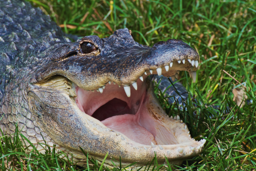

In [ ]:
urls = search_images('alligator', max_images=1)

from fastdownload import download_url
dest = 'alligator.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

For my not-alligator images, I'll use images of a **swamp**.

Searching for 'swamp photos'


/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


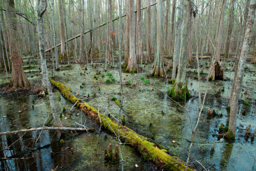

In [ ]:
download_url(search_images('swamp photos', max_images=1)[0], 'swamp.jpg', show_progress=False)
Image.open('swamp.jpg').to_thumb(256,256)

In the following code, I'll search for both terms, `alligator` and `swamp` and store the images in `alligator_or_not/alligator` and `alligator_or_not/swamp` paths, respectively.

The `parents=TRUE` argument creates any intermediate parent directories that don't exist (in this case, the `alligator_or_not` directory). The `exist_ok=TRUE` argument suppresses the `FileExistsError` and does nothing.

In [ ]:
searches = 'swamp','alligator'
path = Path('alligator_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'swamp photo'
Searching for 'swamp sun photo'
Searching for 'swamp shade photo'
Searching for 'alligator photo'
Searching for 'alligator sun photo'
Searching for 'alligator shade photo'


Next, I'll train my model using the code they have provided.

The `get_image_files` function is a fastai function which takes a `Path` object and returns an `L` object with paths to the image files.

In [ ]:
type(get_image_files(path))

fastcore.foundation.L

In [ ]:
get_image_files(path)

(#349) [Path('alligator_or_not/swamp/1b3c3a61-0f7f-4dc2-a704-38202d593207.jpg'),Path('alligator_or_not/swamp/9c9141f2-024c-4e26-b343-c1ca1672fde8.jpeg'),Path('alligator_or_not/swamp/1340dd85-5d98-428e-a861-d522c786c3d7.jpg'),Path('alligator_or_not/swamp/2d3f91dc-cc5f-499b-bec6-7fa0e938fb13.jpg'),Path('alligator_or_not/swamp/84afd585-ce46-4016-9a09-bd861a5615db.jpg'),Path('alligator_or_not/swamp/6222f0b6-1f5f-43ec-b561-8e5763a91c61.jpg'),Path('alligator_or_not/swamp/a71c8dcb-7bbb-4dba-8ae6-8a780d5c27c6.jpg'),Path('alligator_or_not/swamp/bbd1a832-a901-4e8f-8724-feac35fa8dcb.jpg'),Path('alligator_or_not/swamp/45b358b3-1a12-41d4-8972-8fa98b2baa52.jpg'),Path('alligator_or_not/swamp/cf664509-8eb6-42c8-9177-c17f48bc026b.jpg')...]

The fastai `parent_label` function takes a `Path` object and returns a string of the file's parent folder name.

In [ ]:
parent_label(Path('alligator_or_not/swamp/18b55d4f-3d3b-4013-822b-724489a23f01.jpg'))

'swamp'

Some image files that are downloaded may be corrupted, so they have provided a `verify_images` function to find images that can't be opened. Those images are then removed (`unlink`ed) from the path.

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

In [ ]:
failed

(#1) [Path('alligator_or_not/alligator/1eb55508-274b-4e23-a6ae-dbbf1943a9d1.jpg')]

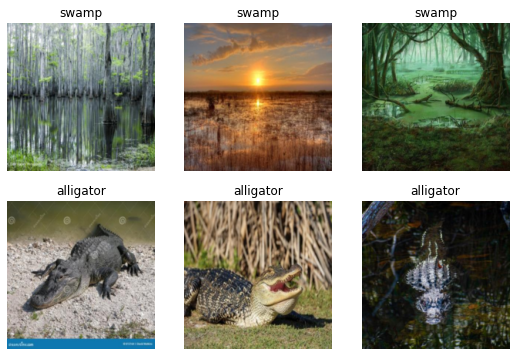

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

I'll train the model using their code which uses the `resnet18` image classification model, and `fine_tune`s it for 3 epochs.

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.690250,0.171598,0.043478,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.127188,0.001747,0.000000,00:02
1,0.067970,0.006409,0.000000,00:02
2,0.056453,0.004981,0.000000,00:02


The accuracy is 100%.

Next, I'll test the model as they've done in the lesson.

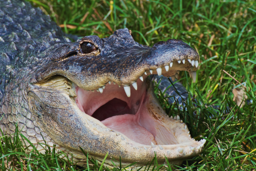

In [ ]:
PILImage.create('alligator.jpg').to_thumb(256,256)

In [ ]:
is_alligator,_,probs = learn.predict(PILImage.create('alligator.jpg'))
print(f"This is an: {is_alligator}.")
print(f"Probability it's an alligator: {probs[0]:.4f}")

This is an: alligator.
Probability it's an alligator: 1.0000


### Video Notes
In this section, I'll take notes while I watch the lesson 1 video.

- This is the fifth version of the course!
- What seemed impossible in 2015 (image recognition of a bird) is now free and something we can build in 2 minutes.
- All models need numbers as their inputs. Images are already stored as numbers in computers. [PixSpy] allows you to (among other things) view the color of each pixel in an image file.
- A `DataBlock` gives fastai all the information it needs to create a computer vision model.
- Creating really interesting, real, working programs with deep learning is something that doesn't take a lot of code, math, or more than a laptop computer. It's pretty accessible.
- Deep Learning models are doing things that very few, if any of us, believed would be possible to do by computers in our lifetime.
- See the [Practical Data Ethics](www.ethics.fast.ai) course as well.
- [Meta Learning: How To Learn Deep Learning And Thrive In The Digital World](https://www.goodreads.com/en/book/show/58213068).
- Books on learning/education:
  - Mathematician's Lament by Paul Lockhart
  - Making Learning Whole by David Perkins
- Why are we able to create a bird-recognizer in a minute or two? And why couldn't we do it before?
  - 2012: Project looking at 5-year survival of breast cancer patients, pre-deep learning approach
    - Assembled a team to build ideas for thousands of features that required a lot of expertise, took years.
    - They fed these features into a logistic regression model to predict survival.
    - Neural networks don't require us to build these features, they build them for us.
  - 2015: Matthew D. Zeiler and Rob Fergus looked inside a neural network to see what it had learned.
    - We don't give it features, we ask it to learn features.
    - The neural net is the basic function used in deep learning.
    - You start with a random neural network, feed it examples and you have it learn to recognize things.
    - The deeper you get, the more sophisticated the features it can find are.
    - What we're going to learn is how neural networks do this automatically.
    - This is the key difference in why we can now do things that we couldn't previously conceive of as possible.
- An image recognizer can also be used to classify sounds (pictures of waveforms).
- Turning time series into pictures for image classification.
- fastai is built on top of PyTorch.
- `!pip install -Uqq fastai` to update.
- Always view your data at every step of building a model.
- For computer vision algorithms you don't need particularly big images.
- For big images, most of the time is taken up opening it, the neural net on the GPU is must faster.
- The main thing you're going to try and figure out is how do I get this data into my model?
- `DataBlock`
  - `blocks=(ImageBlock, CategoryBlock)`: `ImageBlock` is the type of input to the model, `CategoryBlock` is the type of model output
  - `get_image_files(path)` returns a list of all image files in a `path`.
  - It's critical that you put aside some data for testing the accuracy of your model (validation set) with something like `RandomSplitter` for the `splitter` parameter.
  - `get_y` tells fastai how to get the correct label for the photo.
  - Most computer vision architectures need all of your inputs to be the same size, using `Resize` (either `crop` out a piece in the middle or `squish` the image) for the parameter `item_tfms`.
  - `DataLoaders` contains iterators that PyTorch can run through to grab batches of your data to feed the training algorithm.
  - `show_batch` shows you a batch of input/label pairs.
  - A `Learner` combines a model (the actual neural network that we are training) and the data we use to train it with.
  - [PyTorch Image Models (timm)](www.timm.fast.ai).
  - resnet has already been trained to recognize over 1 million images of over 1000 different types. fastai downloads this so you can start with a neural network that can do a lot.
  - `fine_tune` takes those pretrained weights downloaded for you and adjusts them in a carefully controlled way to teach the model differences between your dataset and what it was originally trained for.
  - You pass `.predict` an image, which is how you would deploy your model, returns whether it's a bird or not as a string, integer and probability of whether it's a bird (in this example).

In the code blocks below, I'll train the different types of models presented in the video lesson.

#### Image Segmentation


In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.454409,3.015761,00:06


epoch,train_loss,valid_loss,time
0,1.928762,1.719756,00:02
1,1.649520,1.394089,00:02
2,1.533350,1.344445,00:02
3,1.414438,1.279674,00:02
4,1.291168,1.063977,00:02
5,1.174492,0.980055,00:02
6,1.073124,0.931532,00:02
7,0.992161,0.922516,00:02


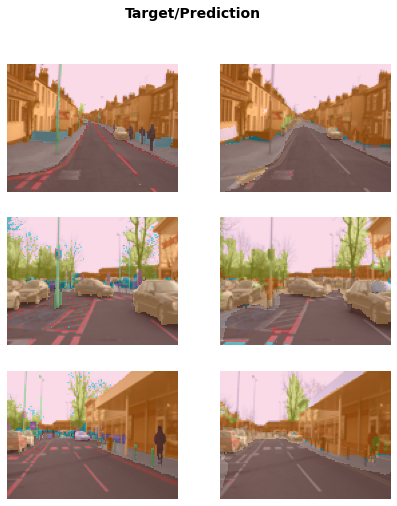

In [ ]:
learn.show_results(max_n=3, figsize=(7,8))

It's amazing how many it's getting correct because this model was trained in about 24 seconds using a tiny amount of data.

I'll take a look at the codes out of curiousity, which is an array of string elements describing different objects in view.

In [ ]:
np.loadtxt(path/'codes.txt', dtype=str)

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

#### Tabular Analysis

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                                               'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize])

dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,State-gov,Some-college,Divorced,Adm-clerical,Own-child,White,False,42.0,138162.000499,10.0,<50k
1,Private,HS-grad,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,False,40.0,73025.003080,9.0,<50k
2,Private,Assoc-voc,Married-civ-spouse,Prof-specialty,Wife,White,False,36.0,163396.000571,11.0,>=50k
3,Private,HS-grad,Never-married,Sales,Own-child,White,False,18.0,110141.999831,9.0,<50k
4,Self-emp-not-inc,12th,Divorced,Other-service,Unmarried,White,False,28.0,33035.002716,8.0,<50k
5,?,7th-8th,Separated,?,Own-child,White,False,50.0,346013.994175,4.0,<50k
6,Self-emp-inc,HS-grad,Never-married,Farming-fishing,Not-in-family,White,False,36.0,37018.999571,9.0,<50k
7,State-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,37.0,239409.001471,14.0,>=50k
8,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,False,50.0,167728.000009,16.0,>=50k
9,Private,HS-grad,Married-civ-spouse,Tech-support,Husband,White,False,38.0,247111.001513,9.0,>=50k


For tabular models, there's not generally going to be a pretrained model that already does something like what you want because every table of data is very different, so generally it doesn't make too much sense to `fine_tune` a tabular model.

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.373780,0.365976,0.832770,00:06
1,0.356514,0.358780,0.833999,00:05


#### Collaborative Filtering

The basis of most recommendation systems.

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

dls.show_batch()

,userId,movieId,rating
0,457,457,3.0
1,407,2959,5.0
2,294,356,4.0
3,78,356,5.0
4,596,3578,4.5
5,547,541,3.5
6,105,1193,4.0
7,176,4993,4.5
8,430,1214,4.0
9,607,858,4.5


There's actually no pretrained collaborative filtering model so we could use `fit_one_cycle` but `fine_tune` works here as well.

In [ ]:
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.498450,1.417215,00:00


epoch,train_loss,valid_loss,time
0,1.375927,1.357755,00:00
1,1.274781,1.176326,00:00
2,1.033917,0.870168,00:00
3,0.810119,0.719341,00:00
4,0.704180,0.679201,00:00
5,0.640635,0.667121,00:00
6,0.623741,0.661391,00:00
7,0.620811,0.657624,00:00
8,0.606947,0.656678,00:00
9,0.605081,0.656613,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,15.0,35.0,4.5,3.886339
1,68.0,64.0,5.0,3.822170
2,62.0,33.0,4.0,3.088149
3,39.0,91.0,4.0,3.788227
4,37.0,7.0,5.0,4.434169
5,38.0,98.0,3.5,4.380877
6,3.0,25.0,3.0,3.443295
7,23.0,13.0,2.0,3.220192
8,15.0,7.0,4.0,4.306846


Note: [RISE](https://rise.readthedocs.io/en/stable/) turnes your notebook into a presentation.

Generally speaking, if it's something that a human can do reasonably quickly, even an expert human (like look at a Go board and decide if it's a good board or not) then that's probably something that deep learning will probably be good at. If it's something that takes logical thought process over time, particularly if it's not based on much data, deep learning probably won't do that well.

The first neural network was built in 1957. The basic ideas have not changed much at all.

What's going on in these models?

- Arthur Samuel in late 1950s invented Machine Learning.
- Normal program: input -> program -> results.
- Machine Learning model: input and weights (parameters) -> model -> results.
  - The model is a mathematical function that takes the input, multiplies them with one set of weights and adds them up, then does that again for a second set of weights, and so forth.
  - It takes all of the negative numbers and replaces them with 0.
  - It takes all those numbers as inputs to the next layer.
  - And it repeats a few times.
- Weights start out as being random.
- A more useful workflow: input/weights -> model -> results -> loss -> update weights.
- The loss is a number that says how good the results were.
- We need a way to come up with a new set of weights that are a bit better than the current weights.
- "bit better" weights means it makes the loss a bit better.
- If we make it a little bit better a few times, it'll eventually get good.
- Neural nets proven to solve any computable function (i.e. it's flexible enough to update weights until the results are good).
- "Generate artwork based on someone's twitter bio" is a computable function.
- Once we've finished the training procedure we don't the loss and the weights can be integrated into the model.
- We end up with inputs -> model -> results which looks like our original idea of a program.
- Deploying a model will have lots of tricky details but there will be one line of code which says `learn.predict` which takes an input and provides results.
- The most important thing to do is experiment.


### Book Notes
Chapter 1: Your Deep Learning Journey
In this section, I'll take notes while I read Chapter 1 in the textbook.

#### Deep Learning is for Everyone

- What you don't need for deep learning: lots of math, lots of data, lots of expensive computers.
- Deep learning is a computer technique to extract and transform data by using multiple layers of neural networks. Each of these layers takes its inputs from previous layers and progressively refines them. The layers are trained by algorithms that minimize their errors and improve their accuracy. In this way, the network learns to perform a specified task.

#### Neural Networks: A Brief History
- Warren McCulloch and Walter Pitts developed a mathematical model of an artificial neuron in 1943.
- Most of Pitt's famous work was done while he was homeless.
- Psychologist Frank Rosenblatt further developed the artificial neuron to give it the ability to learn and built the first device that used these principles, the Mark I Perceptron, which was able to recognize simple shapes.
- Marvin Minsky and Seymour Papert wrote a book about the Perceptron and showed that using multiple layers of the devices would allow the limitations of a single layer to be addressed.
- The 1986 book Parallel Distributed Processing (PDP) by David Rumelhart, James McClelland, and the PDP Research Group defined PDP as requiring the following:
  - A set of *processing units*.
  - A *state of activation*.
  - An *output function* for each unit.
  - A *pattern of connectivity* among units.
  - A *propogation rule* for propagating patterns of activities through the network of connectivities.
  - An *activation rule* for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit.
  - A *learning rule* whereby patterns of connectivity are modified by experience.
  - An *environment* within which the system must operate.

#### How to Learn Deep Learning
- The hardest part of deep learning is artisanal: how do you know if you've got enough data, whether it is in the right format, if your model is training properly, and, if it's not, what you should do about it?

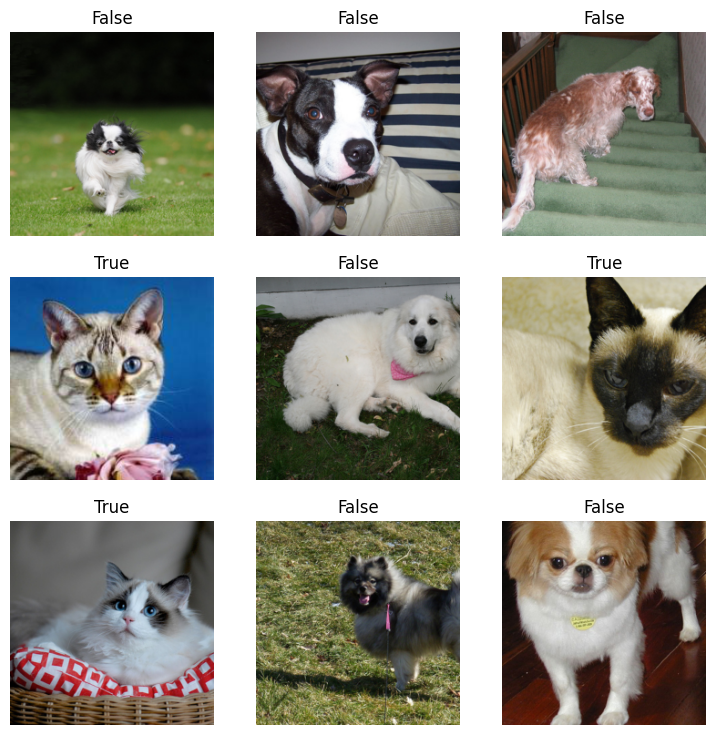

In [1]:
from fastai.vision.all import * 
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat, 
    item_tfms=Resize(224)
)

dls.show_batch()

In [2]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,0.140327,0.019135,0.007442,01:05


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.070464,0.024966,0.006766,01:00


The _error rate_ is the proportion of images that were incorrectly identified.

Check this model actually works with an image of a dog or cat. I'll download a picture from google and use it for prediction:

In [4]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

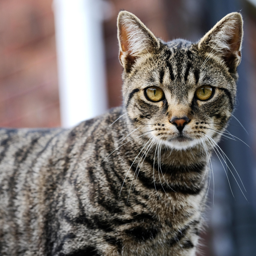

In [5]:
im = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(im)
im.to_thumb(256)

In [6]:
print(f'Is this a cat?: {is_cat}.')
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


#### What is Machine Learning?
- A traditional program: **inputs** -> **program** -> **results**.
- In 1949, IBM researcher Arthur Samuel started working on machine learning. His basic idea was this: instead of telling the computer the exact steps required to solve a problem, show it examples of the problem to solve, and let it figure out how to solve it itself.
- In 1961 his checkers-playing program had learned so much that it beat the Connecticut state champion.
- Weights are just variables and a *weight assignment* is a particular choice of values for those variables.
- The program's inputs are values that it processes in order to produce its results (for instance, taking image pixels as inputs, and returning the classification "dog" as a result).
- Because the weights affect the program, they are in a sense another kind of input.
- A program using weight assignment: **inputs and weights** -> **model** -> **results**.
- A model is a special kind of program, on that can do many different things depending on the weights.
- Weights = parameters, with the term "weights" reserved for a particulat type of model parameter.
- Learning would become entirely automatic when the adjustment of the weights was also automatic.
- Training a maching learning model: **inputs and weights** -> **model** -> **results** -> **performance** -> **update weights**.
- results are different than the performance of a model.
- Using a trained model as a program -> **inputs** -> **model** -> **results**.
- maching learning is the training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

#### What is a Neural Network?
- Neural networks is a mathematical function that can solve any problem to any level of accuracy.
- Stochastic Gradient Descent (SGD) is a completely general way to update the weights of a neural network, to make it improve at any given task.
- Image classification problem:
  - Our inputs are the images.
  - Our weights are the weights in the neural net.
  - Our model is a neural net.
  - Our results are the values that are calculated by the neural net, like "dog" or "cat".

#### A Bit of Deep Learning Jargon
- The functional form of the model is called its *architecture*.
- The weights are called *parameters*.
- The *predictions* are calculated from the *independent variable*, which is the *data* not including the *labels*.
- The *results* or the model are called *predictions*.
- The measure of *performance* is called the *loss*.
- The loss depends not only on the predictions, but also on the correct *labels* (also known as *targets* or the *dependent variable*).
- Detailed training loop: **inputs** and **parameters** -> **architecture** -> **predictions** (+ **labels**) -> **loss** -> update **parameters**.

#### Limitations Inherent to Machine Learning
- A model cannot be created without data.
- A model can learn to operate on only the patterns seen in the input data used to train it.
- This learning approach creates only predictions, not recommended actions.
- It's not enough to just have examples of input data, we need labels for that data too.
- *Positive feedback loop*: the more the model is used, the more biased the data becomes, making the model even more biased, and so forth.

#### How Our Image Recognizer Works
- `item_tfms` are applied to each item while `batch_tfms` are applied to a *batch* of items at a time using the GPU.
- A *classification model* attempts to predict a class, or category.
- A *regression model* is one that attempts to predict one or more numeric quantities, such as temperature or location.
- The parameter `seed=42` sets the *random seed* to the same value every time we run this code, which means we get the same validation set every time we run it. This way, if we change our model and retrain it, we know that any differences are due to the changes to the model, not due to having a different random validation set.
- We care about how well our model works on *previously unseen images*.
- The longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is *overfitting*.
- Overfitting is the single most important and challenging issue when training for all machine learning practitioners, and all algorithms.
- You should only use methods to avoid overfitting after you have confirmed that overfitting is occurring (i.e., if you have observed the validation accuracy getting worse during training)
- fastai defaults to `valid_pct=0.2`.
- Models using architectures with more layers take longer to train and are more prone to overfitting, on the other hand, when using more data, they can be quite a bit more accurate.
- A *metric* is a function that measures the quality of the model's predictions using the validation set.
- *error_rate* tells you what percentage of inputs in the validation set are being classified incorrectly.
- *accuracy* = `1.0 - error_rate`.
- The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. A good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand.
- A model that has weights that have already been trained on another dataset is called a *pretrained model*.
- When using a pretrained model, `cnn_learner` will remove the last layer and replace it with one or more new layers with randomized weights. This last part of the model is known as the *head*.
- Using a pretrained model for a task different from what is was originally trained for is known as *transfer learning*.
- The architecture only describes a *template* for a mathematical function; it doesn't actually do anything until we provide values for the millions of parameters it contains.
- To fit a model, we have to provide at least one piece of information: how many times to look at each image (known as number of epochs).
- `fit` will fit a model (i.e., look at images in the training set multiple times, each time updating the parameters to make the predictions closer and closer to the target labels).
- Fine-Tuning: a transfer learning technique that updates the parameters of a pretrained model by training for additional epochs using a different task from that used for pretraining.
- `fine_tune` has a few parameters you can set, but in the default form it does two steps:
  - Use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with your dataset.
  - Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which don't require many changes from the pretrained weights).
- The *head* of the model is the part that is newly added to be specific to the new dataset.
- An *epoch* is one complete pass through the dataset.

#### What Our Image Recognizer Learned
- When we fine tune our pretrained models, we adapt what the last layers focus on to specialize on the problem at hand.

#### Image Recognizers Can Tackle Non-Image Tasks
- A lot of things can be represented as images. 
- Sound can be converted to a spectogram.
- Times series data can be created into an image using Gramian Angular Difference Field (GADF).
- If the human eye can recognize categories from the images, then a deep learning model should be able to do so too.

#### Jargon Recap

|Term|Meaning|
|:-|:-|
|Label|The data that we're trying to predict|
|Architecture|The *template* of the model that we're trying to fit; i.e., the actual mathematical function that we're passing the input data and parameters to|
|Model|The combination of the architecture with a particular set of parameters|
|Parameters|The values in the model that change what task it can do and that are updated through model training|
|Fit|Update the parameters of the model such that the predictions of the model using the input data match the target labels|
|Train|A synonym for *fit*|
|Pretrained Model|A model that has already been trained, generally using a large dataset, and will be fine-tuned|
|Fine-tune|Update a pretrained model for a different task|
|Epoch|One complete pass through the input data|
|Loss|A measure of how good the model is, chosen to drive training via SGD|
|Metric|A measurement of how good the model is using the validation set, chosen for human consumption|
|Validation set|A set of data held out from training, used only for measuring how good the model is|
|Training set|The data used for fitting the model; does not include any data from the validation set|
|Overfitting|Training a model in such a way that it remembers specific features of the input data, rather than generalizing wel to data not seen during training|
|CNN|Convolutional neural network; a type of neural network that works particularly well for computer vision tasks|

#### Deep Learning is Not Just for Image Classification
- Segmentation
- Natural language processing (see below)
- Tabular (see Adults income classification above)
- Collaborative filtering (see MovieLens ratings predictor above)
- Start by using one of the cut-down dataset versions and later scale up to the full-size version. This is how the world's top practitioners do their modeling in practice; they do most of their experimentation and prototyping with subsets of their data, and use the full dataset only when they have a good understanding of what they have to do.

#### Validation Sets and Test Sets
- If the model makes an accurate prediction for a data item, that should be because it has learned characteristics of that kind of item, and not because the model has been shaped by *actually having seen that particular item*.
- Hyperparameters: various modeling choices regarding network architecture, learning rates, data augmentation strategies, and other factors.
- We, as modelers, are evaluating the model by looking at predictions on the validation data when we decide to explore new hyperparameter values and we are in danger of overfitting the validation data through human trial and error and exploration.
- The *test set* can be used only to evaluate the model at the very end of our efforts.
- Training data is fully exposed to training and modeling processes, validation data is less exposed and test data is fully hidden.
- The test and validation sets should have enough data to ensure that you get a good estimate of your accuracy.
- The discipline of the test set helps us keep ourselves intellectually honest.
- It's a good idea for you to try out a simple baseline model yourself, so you know what a really simply model can achieve.

#### Use Judgment in Defining Test Sets
- A key property of the validation and test sets is that they must be representative of the new data you will see in the future.
- As an example, for time series data, use earlier dates for training set and later more recent dates as validation set
- The data you will be making predictions for in production may be *qualitatively different* from the data you have to train your model with.

In [1]:
from fastai.text.all import *

# I'm using IMDB_SAMPLE instead of the full IMDB dataset since it either takes too long or 
# I get a CUDA Out of Memory error if the batch size is more than 16 for the full dataset
# Using a batch size of 16 with the sample dataset works fast
dls = TextDataLoaders.from_csv(
    path=untar_data(URLs.IMDB_SAMPLE),
    csv_fname='texts.csv',
    text_col=1,
    label_col=0,
    bs=16) 

dls.show_batch()

,text,category
0,"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj vargas became i was always aware that something did n't quite feel right . xxmaj victor xxmaj vargas suffers from a certain xxunk on the director 's part . xxmaj apparently , the director thought that the ethnic backdrop of a xxmaj latino family on the lower east side , and an xxunk storyline would make the film critic proof . xxmaj he was right , but it did n't fool me . xxmaj raising xxmaj victor xxmaj vargas is",negative
1,"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with the xxunk possible scenarios to get the two protagonists together in the end . xxmaj in fact , all its charm is xxunk , contained within the characters and the setting and the plot … which is highly believable to xxunk . xxmaj it 's easy to think that such a love story , as beautiful as any other ever told , * could * happen to you … a feeling you do n't often get from other romantic comedies",positive
2,"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject , but xxmaj soderbergh 's most recent stinker , xxmaj the xxmaj girlfriend xxmaj xxunk ) , was also missing a story , so narrative ( and editing ? ) seem to suddenly be xxmaj soderbergh 's main challenge . xxmaj strange , after 20 - odd years in the business . xxmaj he was probably never much good at narrative , just xxunk it well inside "" edgy "" projects . \n\n xxmaj none of this excuses him this present ,",negative
3,"xxbos i really wanted to love this show . i truly , honestly did . \n\n xxmaj for the first time , gay viewers get their own version of the "" the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance of love with 15 suitors ( or "" mates "" as they are referred to in the show ) . xxmaj the only problem is half of them are straight and xxmaj james does n't know this . xxmaj if xxmaj james picks a gay one , they get a trip to xxmaj new xxmaj zealand , and xxmaj if he picks a straight one , straight guy gets $ 25 , xxrep 3 0 . xxmaj how can this not be fun",negative
4,"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics that are terribly dated today , the game xxunk you into the role of xxunk even * think * xxmaj i 'm going to attempt spelling his last name ! ) , an xxmaj american xxup xxunk . caught in an underground bunker . xxmaj you fight and search your way through xxunk in order to achieve different xxunk for the six xxunk , let 's face it , most of them are just an excuse to hand you a weapon",positive
5,"xxbos xxmaj i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" october xxmaj sky "" ( an xxunk of the book 's title ) is good 

In [2]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2) 

epoch,train_loss,valid_loss,accuracy,time
0,0.629276,0.553454,0.740000,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.466581,0.548400,0.740000,00:30
1,0.410401,0.418941,0.825000,00:30
2,0.286162,0.410872,0.830000,00:31
3,0.192047,0.405275,0.845000,00:31


In [3]:
# view actual vs prediction
learn.show_results()

,text,category,category_
0,"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" la xxmaj xxunk , "" based on a play by xxmaj arthur xxmaj xxunk , who is given an "" inspired by "" credit . xxmaj it starts from one person , a prostitute , standing on a street corner in xxmaj brooklyn . xxmaj she is picked up by a home contractor , who has sex with her on the hood of a car , but ca n't come . xxmaj he refuses to pay her . xxmaj when he 's off xxunk , she",positive,positive
1,"xxbos xxmaj bonanza had a great cast of wonderful actors . xxmaj xxunk xxmaj xxunk , xxmaj pernell xxmaj whitaker , xxmaj michael xxmaj xxunk , xxmaj dan xxmaj blocker , and even xxmaj guy xxmaj williams ( as the cousin who was brought in for several episodes during 1964 to replace xxmaj adam when he was leaving the series ) . xxmaj the cast had chemistry , and they seemed to genuinely like each other . xxmaj that made many of their weakest stories work a lot better than they should have . xxmaj it also made many of their best stories into great western drama . \n\n xxmaj like any show that was shooting over thirty episodes every season , there are bound to be some weak ones . xxmaj however , most of the time each episode had an interesting story , some kind of conflict ,",positive,negative
2,"xxbos i watched xxmaj grendel the other night and am compelled to put together a xxmaj public xxmaj service xxmaj announcement . \n\n xxmaj grendel is another version of xxmaj beowulf , the thousand - year - old xxunk - saxon epic poem . xxmaj the scifi channel has a growing catalog of xxunk and uninteresting movies , and the previews promised an xxunk low - budget mini - epic , but this one xxunk to let me switch xxunk . xxmaj it was xxunk , xxunk , bad . i watched in xxunk and horror at the train wreck you could n't tear your eyes away from . i reached for a xxunk and managed to capture part of what i was seeing . xxmaj the following may contain spoilers or might just save your xxunk . xxmaj you 've been warned . \n\n - xxmaj just to get",negative,negative
3,"xxbos xxmaj this is the last of four xxunk from xxmaj france xxmaj i 've xxunk for viewing during this xxmaj christmas season : the others ( in order of viewing ) were the uninspired xxup the xxup black xxup tulip ( 1964 ; from the same director as this one but not nearly as good ) , the surprisingly effective xxup lady xxmaj oscar ( 1979 ; which had xxunk as a xxmaj japanese manga ! ) and the splendid xxup cartouche ( xxunk ) . xxmaj actually , i had watched this one not too long ago on late - night xxmaj italian xxup tv and recall not being especially xxunk over by it , so that i was genuinely surprised by how much i enjoyed it this time around ( also bearing in mind the xxunk lack of enthusiasm shown towards the film here and elsewhere when",positive,positive
4,"xxbos xxmaj this is not really a zombie film , if we 're xxunk zombies as the dead walking around . xxmaj here the protagonist , xxmaj xxunk xxmaj louque ( played by an unbelievably young xxmaj dean xxmaj xxunk ) , xxunk control of a method to create zombies , though in fact , his ' method ' is to mentally project his thoughts and control other living people 's minds turning them into hypnotized slaves . xxmaj this is an interesting concept for a movie , and was done much more effectively by xxmaj xxunk xxmaj lang in his series of ' dr . xxmaj mabuse ' films , including ' dr . xxmaj mabuse the xxmaj xxunk ' ( 1922 ) and ' the xxmaj testament of xxmaj dr . xxmaj mabuse ' ( 1933 ) . xxmaj here it is unfortunately xxunk to his quest to",negative,positive
5,"xxbos "" once upon a time there was a charming land called xxmaj france … . xxmaj people lived happily then . xxmaj the women were easy and the men xxun

In [5]:
review_text = "I really liked the movie!"
learn.predict(review_text)

('positive', tensor(1), tensor([0.0174, 0.9826]))

### Questionnaire
1. Do you need these for deep learning?
    - Lots of Math (FALSE).
    - Lots of Data (FALSE).
    - Lots of expensive computers (FALSE).
    - A PhD (FALSE).
2. Name five areas where deep learning is now the best tool in the world
    - Natural Language Processing (NLP).
    - Computer vision.
    - Medicine.
    - Image generation.
    - Recommendation systems.
3. What was the name of the first device that was based on the principle of the artificial neuron?
    - Mark I Perceptron.
4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
    - A series of *processing units*.
    - A *state of activation*.
    - An *output function* for each unit.
    - A *pattern of connectivity* among units.
    - A *propagation rule* for propagating patterns of activities through the network of connectivities.
    - An *activation rule* for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit.
    - A *learning rule* whereby patterns of connectivity are modified by experience.
    - An *environment* within which the system must operate.
5. What were the two theoretical misunderstandings that held back the field of neural networks?
    - Using multiple layers of the device would allow limitations of one layer to be addressed---this was ignored.
    - More than two  layers are needed to get practical, good perforamnce---only in the last decade has this been more widely appreciated and applied.
6. What is a GPU?
    - A Graphical Processing Unit, which can perform thousands of tasks at the same time.
7. Open a notebook and execute a cell containing: `1+1`. What happens?
    - Depending on the server, it may take some time for the output to generate, but running this cell will output `2`.
8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen. 
    - (I did this for the notebook shared for Lesson 1).
9. Complete the Jupyter Notebook online appendix.
    - Done. Will reference some of it again.
10. Why is it hard to use a traditional computer program to recognize images in a photo?
    - Because it's hard to instruct a computer clear instructions to recognize images.
11. What did Samuel mean by "weight assignment"?
    - A particular choice for weights (variables)
12. What term do we normally use in deep learning for what Samuel called "weights"?
    - Parameters
13. Draw a picture that summarizes Samuel's view of a machine learning model
    - input and weights -> model -> results -> performance -> update weights/inputs
14. Why is it hard to understand why a deep learning model makes a particular prediction?
    - Because a deep learning model has many layers and connectivities and activations between neurons that are not intuitive to our understanding. 
15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
    - Universal approximation theorem.
16. What do you need in order to train a model?
    - Labeled data (Inputs and targets).
    - Architecture.
    - Initial weights.
    - A measure of performance (loss, accuracy).
    - A way to update the model (SGD).
17. How could a feedback loop impact the rollout of a predictive policing model?
    - The model will end up predicting where arrests are made, not where crime is taking place, so more police officers will go to locations where more arrests are predicted and feed that data back to the model which will reinforce the prediction of arrests in those areas, continuing this feedback loop of predictions -> arrests -> predictions.
18. Do we always have to use 224x224-pixel images with the cat recognition model?
    - No, that's just the convention for image recognition models.
    - You can use larger images but it will slow down the training process (it takes longer to open up bigger images).
19. What is the difference between classification and regression?
    - Classification predicts discrete classes or categories.
    - Regression predicts continuous values.
20. What is a validation set? What is a test set? Why do we need them?
    - A validation set is a dataset upon which a model's accuracy (or metrics in general) is calculated during training, as well as the dataset upon which the performance of different hyperparameters (like batch size and learning rate) are measured.
    - A test set is a dataset upon which a model's final performance is measured, a truly unseen dataset for both the model and the practitioner
21. What will fastai do if you don't provide a validation set?
    - Set aside a random 20% of the data as the validation set by default
22. Can we always use a random sample for a validation set? Why or why not?
    - No, in situations where we want to ensure that the model's accuracy is evaluated on data the model has not seen, we should not use a random validation set. Instead, we should create an intentional validation set. For example:
        - For time series data, use the most recent dates as the validation set
        - For human recognition data, use images of different people for training and validation sets
23. What is overfitting? Provide an example.
    - Overfitting is when a model memorizes features of the training dataset instead of learning generalizations of the features in the data. An example of this is when a model memorizes training data facial features but then cannot recognize different faces in the real world. Another example is when a model memorizes the handwritten digits in the training data, so it cannot then recognize digits written in different handwriting. Overfitting can be observed during training when the validation loss starts to increase as the training loss decreases.
24. What is a metric? How does it differ from loss?
    - A metric a measurement of how good a model is performing, chosen for human consumption. A loss is also a measurement of how good a model is performing, but it's chosen to drive training using an optimizer.
25. How can pretrained models help?
    - Pretrained models are already good at recognizing many generalized features and so they can help by providing a set of weights in an architecture that are capable, reducing the amount of time you need to train a model specific to your task.
26. What is the "head" of the model?
    - The last/top few neural network layers which are replaced with randomized weights in order to specialize your model via training on the task at hand (and not the task it was pretrained to perform).
27. What kinds of features do the early layers of a CNN find? How about the later layers?
    - Early layers: simple features lie lines, color gradients
    - Later layers: compelx features like dog faces, outlines of people
28. Are image models useful only for photos?
    - No! Lots of things can be represented by images so if you can represent something (like a sound) as an image (spectogram) and differences between classes/categories are easily recognizable by the human eye, you can train an image classifier to recognize it.
29. What is an architecture?
    - A template, mathematical function, to which you pass input data to in order to fit/train a model
30. What is segmentation?
    - Recognizing different objects in an image based on pixel colors (each object is a different pixel color)
31. What is `y_range` used for? When do we need it?
    - It's used to specify the output range of a regression model. We need it when the target is a continuous value.
32. What are hyperparameters?
    - Modeling choices such as network architecture, learning rates, data augmentation strategies and other higher level choices that govern the meaning of the weight parameters.
33. What is the best way to avoid failures when using AI in an organization?
    - Making sure you have good validation and test sets to evaluate the performance of a model on real world data.
    - Trying out a simple baseline model to know what level of performance such a model can achieve.

### Further Research

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
    - [CPU vs GPU for Machine Learning](https://blog.purestorage.com/purely-informational/cpu-vs-gpu-for-machine-learning/)
        - CPUs process tasks in a sequential manner, GPUs process tasks in parallel.
        - GPUs can have thousands of cores, processing tasks at the same time.
        - GPUs have many cores processing at low speeds, CPUs have few cores processing at high speeds.
        - Some algorithms are optimized for CPUs rather than GPUs (time series data, recommendation systems that need lots of memory).
        - Neural networks are designed to process tasks in parallel.
    - [CPU vs GPU in Machine Learning Algorithms: Which is Better?](https://thinkml.ai/cpu-vs-gpu-in-machine-learning-algorithms-which-is-better/)
        - Machine Learning Operations Preferred on CPUs
            - Recommendation systems that involve huge memory for embedding layers.
            - Support vector machines, time-series data, algorithms that don't require parallel computing.
            - Recurrent neural networks because they use sequential data.
            - Algorithms with intensive branching.
        - Machine Learning Operations Preferred on GPUs
            - Operations that involve parallelism.
    - [Why Deep Learning Uses GPUs](https://towardsdatascience.com/why-deep-learning-uses-gpus-c61b399e93a0)
        - Neural networks are specifically made for running in parallel.
2. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.
    - [Hidden Risks of Machine Learning Applied to Healthcare: Unintended Feedback Loops Between Models and Future Data Causing Model Degradation](http://proceedings.mlr.press/v126/adam20a/adam20a.pdf)
        - If clinicians fully trust the machine learning model (100% adoption of the predicted label) the false positive rate (FPR) grows uncontrollably with the number of updates.
    - [Runaway Feedback Loops in Predictive Policing](https://arxiv.org/pdf/1706.09847.pdf)
        - Once police are deployed based on these predictions, data from observations in the neighborhood is then used to further update the model.
        - Discovered crime data (e.g., arrest counts) are used to help update the model, and the process is repeated.
        - Predictive policing systems have been empirically shown to be susceptible to runaway feedback loops, where police are repeatedly sent back to the same neighborhoods regardless of the true crime rate.
    - [Pitfalls of Predictive Policing: An Ethical Analysis](https://vce.usc.edu/volume-5-issue-3/pitfalls-of-predictive-policing-an-ethical-analysis/#:~:text=By%20highlighting%20neighborhoods%20as%20high,also%20impacted%20by%20predictive%20policing.)
        - Predictive policing relies on a large database of previous crime data and forecasts where crime is likely to occur. Since the program relies on old data, those previous arrests need to be unbiased to generate unbiased forecasts.
        - People of color are arrested far more often than white people for committing the same crime.
        - Racially biased arrest data creates biased forecasts in neighborhoods where more people of color are arrested.
        - If the predictive policing algorithm is using biased data to divert more police forces towards less affluent neighborhoods and neighborhoods of color, then those neighborhoods are not receiving the same treatment as others. 
    - [Bias in Criminal Risk Scores Is Mathematically Inevitable, Researchers Say](https://www.propublica.org/article/bias-in-criminal-risk-scores-is-mathematically-inevitable-researchers-say)
        - The algorithm COMPAS which predicts whether a person is "high-risk" and deemed more likely to be arrested in the future, leads to being imprisoned (instead of sent to rehab) or longer sentences. 
    - [Can bots discriminate? It's a big question as companies use AI for hiring](https://www.nprillinois.org/2023-01-31/can-bots-discriminate-its-a-big-question-as-companies-use-ai-for-hiring)
        - If an older candidate makes it past the resume screening process but gets confused by or interacts poorly with the chatbot, that data could teach the algorithm that candidates with similar profiles should be ranked lower
    - [Echo chambers, rabbit holes, and ideological bias: How YouTube recommends content to real users](https://www.brookings.edu/research/echo-chambers-rabbit-holes-and-ideological-bias-how-youtube-recommends-content-to-real-users/)
        - We find that YouTube’s algorithm pushes real users into (very) mild ideological echo chambers.
        - We found that 14 out of 527 (~3%) of our users ended up in rabbit holes.
        - Finally, we found that, regardless of the ideology of the study participant, the algorithm pushes all users in a moderately conservative direction.
